In [1]:
import pandas as pd
test_data = pd.read_csv("Brexit.csv")

In [4]:
test_data

,time,tweets
0,2019-04-30 14:28:37,RT @Brexit_Support: BBC to be fined for #Brexi...
1,2019-04-30 14:28:36,RT @BBCWorldatOne: “Labour activists and membe...
2,2019-04-30 14:28:32,RT @Kishan_Devani: RT if you think this could ...
3,2019-04-30 14:28:32,RT @Brexit_Support: BBC to be fined for #Brexi...
4,2019-04-30 14:28:29,RT @MichelBarnier: Very good meetings today in...
5,2019-04-30 14:28:21,RT @brexit_politics: Do you believe we have mo...
6,2019-04-30 14:28:20,Not many on the bus as they arrived in the tow...
7,2019-04-30 14:28:16,Kudos to @EUROPEUM for a fun event with a grea...
8,2019-04-30 14:28:12,"In 2018, about 600 #British citizens registere..."
9,2019-04-30 14:28:08,Fewer British holidaymakers have booked a summ...


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import Word
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix


def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',string)
    string = re.sub('@[^\s]+','',string)    
    string = re.sub(r'#([^\s]+)', r'\1', string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

data = pd.read_csv("Brexit.csv")
x = data['tweets'].tolist()
y = data['time'].tolist()

for index,value in enumerate(x):
    x[index] = ' '.join([Word(word).lemmatize() for word in clean_str(value).split()])

vect = pickle.load(open("us-polti.vect","rb"))
X = vect.transform(x)

In [12]:
print(X.shape)

(4000, 5852)


In [9]:
import pickle
model = pickle.load(open("Tfidf-RandomForestClassifier.sav","rb"))

In [13]:
prediction = model.predict(X)

In [19]:
diction = {
    "positive": 0,
    "negative": 0,
    "neutral": 0
}

In [21]:
for item in prediction:
    value = diction[item]+1
    diction[item] = value

In [22]:
diction

{'positive': 169, 'negative': 764, 'neutral': 3067}

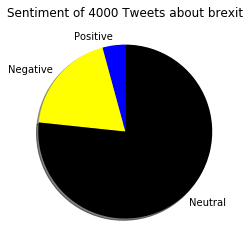

In [28]:
import matplotlib.pyplot as plt

labels = 'Positive', 'Negative', 'Neutral'
positive = diction["positive"]
negative = diction["negative"]
neutral = diction["neutral"]
sizes = [positive, negative, neutral]
colors = ['blue', 'yellow', 'black']
text = "brexit"

## use matplotlib to plot the chart
plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90)
plt.title("Sentiment of 4000 Tweets about "+ text)
plt.show()